<a href="https://colab.research.google.com/github/Valik13/ml_lab2/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving email_spam.csv to email_spam.csv
Saving exams.csv to exams.csv
Saving mount.jpg to mount.jpg


In [3]:
data = pd.read_csv("exams.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


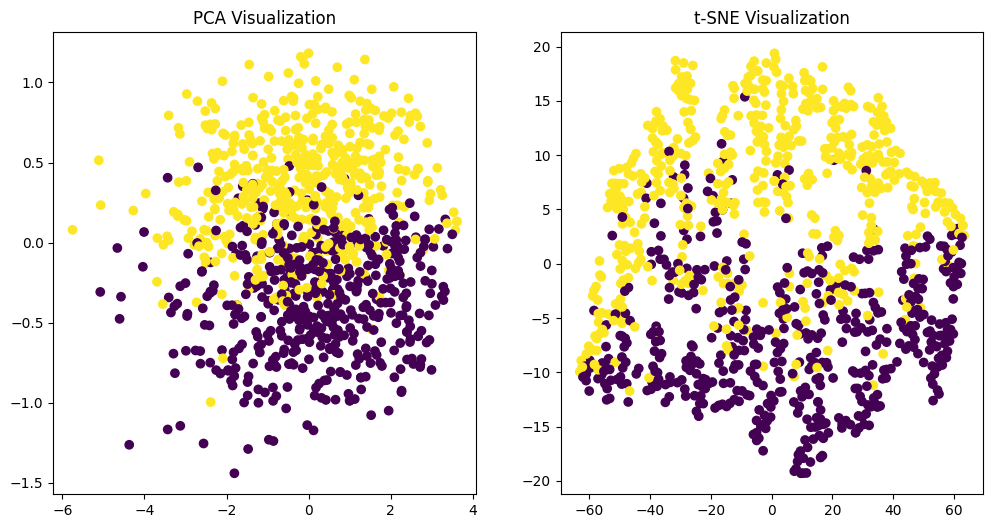

In [4]:
numerical_features = data[['math score', 'reading score', 'writing score']]
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
# PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(numerical_features_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(numerical_features_scaled)

# Візуалізація
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=data['gender'].apply(lambda x: 0 if x == 'female' else 1), cmap='viridis')
ax1.set_title('PCA Visualization')
ax2.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['gender'].apply(lambda x: 0 if x == 'female' else 1), cmap='viridis')
ax2.set_title('t-SNE Visualization')
plt.show()

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

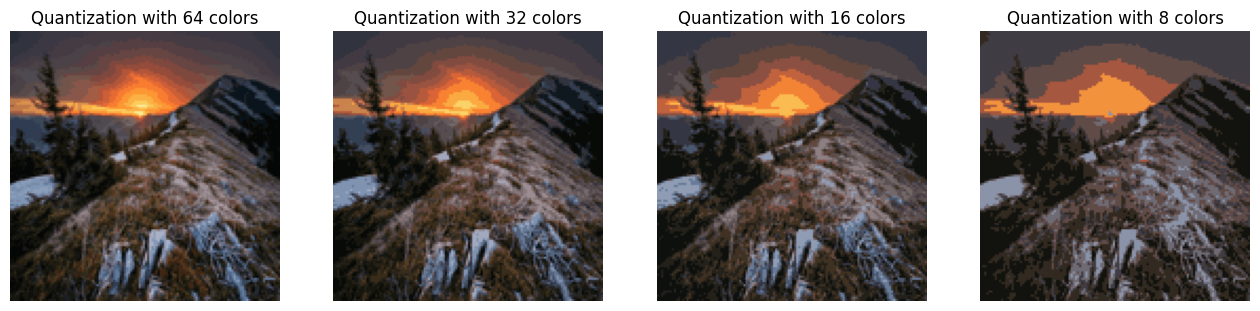

In [6]:
image = Image.open("mount.jpg")
image = image.resize((128, 128))
data_image = np.array(image).reshape(-1, 3)
def quantize_image(data_image, n_colors):
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(data_image)
    quantized_img = kmeans.cluster_centers_[kmeans.labels_]
    return quantized_img.reshape(128, 128, 3).astype(np.uint8)

# Візуалізація квантування для різних рівнів
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, n_colors in enumerate([64, 32, 16, 8]):
    quantized_img = quantize_image(data_image, n_colors)
    axs[i].imshow(quantized_img)
    axs[i].set_title(f'Quantization with {n_colors} colors')
    axs[i].axis('off')
plt.show()

In [7]:
data_3 = pd.read_csv("email_spam.csv")
data_3.head(5)

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [8]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

In [9]:
# Передобробка текстів
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Перетворення в нижній регістр, видалення пунктуації та стоп-слів
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
data_3['cleaned_text'] = data_3['text'].apply(preprocess_text)
data_3

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,text,type,cleaned_text
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam,hi james claim complimentary gift yet ive comp...
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam,alttext congratulations earned 500 completed f...
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam,heres github launch code mortyj420 octocat sta...
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam,hello thank contacting virtual reward center v...
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam,hey prachanda rawal todays newsletter jampacke...
...,...,...,...,...
79,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",not spam,dear maryam would like thank application role ...
80,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",not spam,dear customer welcome kilimall thanks much joi...
81,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",not spam,dear vladis163rus steam guard code need login ...
82,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,not spam,view browser log skrill logo money movers make...


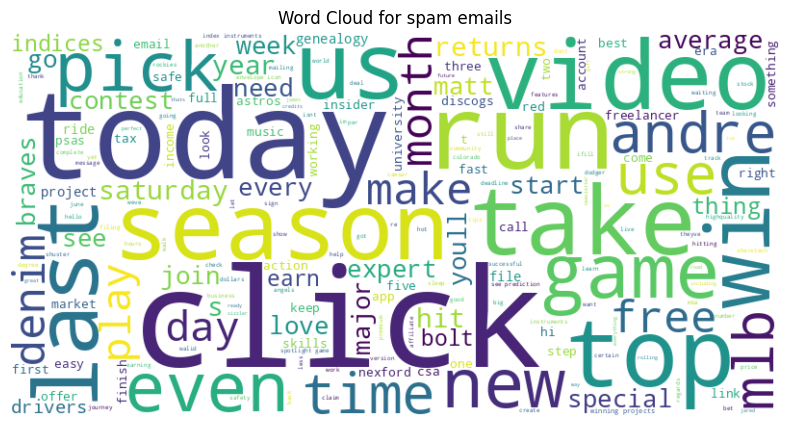

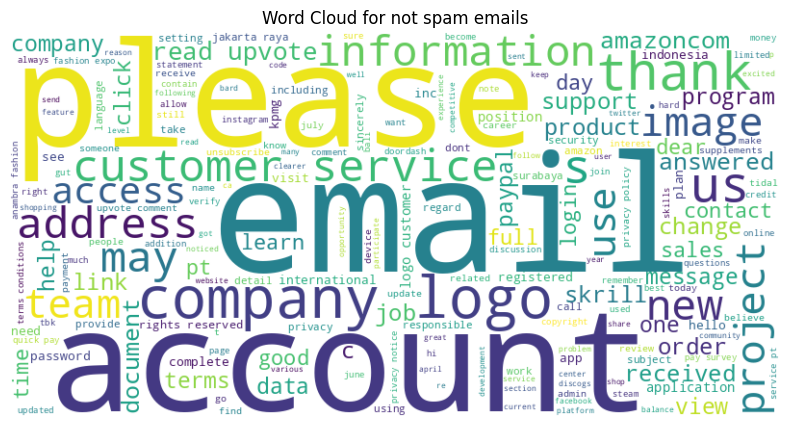

In [10]:
def create_wordcloud(data, label):
    text = ' '.join(data[data['type'] == label]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} emails')
    plt.axis('off')
    plt.show()

# Виклик для кожного класу
create_wordcloud(data_3, 'spam')
create_wordcloud(data_3, 'not spam')

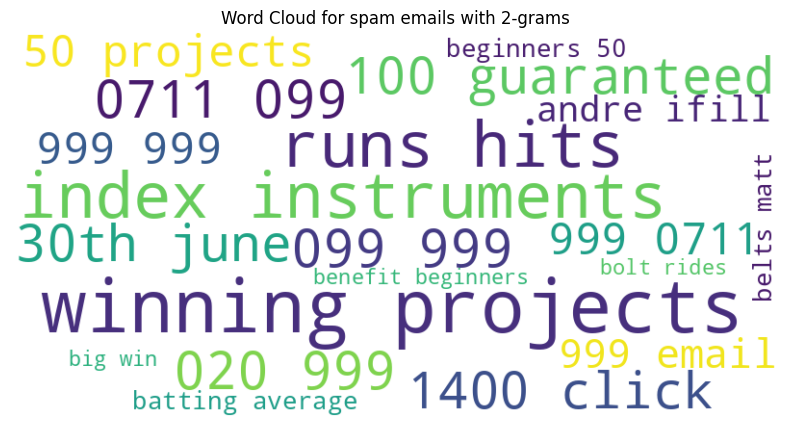

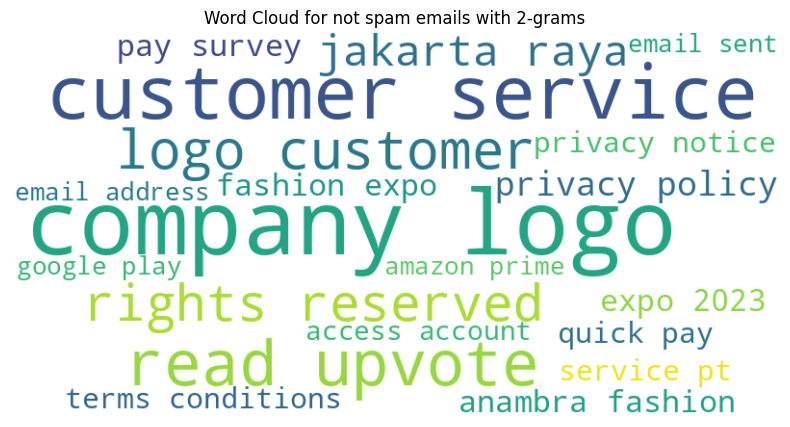

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_ngrams_wordcloud(data, label, ngram_range=(2, 2), top_n=20):

    texts = data[data['type'] == label]['cleaned_text']

    # Використовуємо CountVectorizer для n-грам
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(texts)
    word_freq = X.toarray().sum(axis=0)

    # Збирання n-грам та їх частот
    word_freq_dict = {word: freq for word, freq in zip(vectorizer.get_feature_names_out(), word_freq)}
    sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:top_n])

    # Створюємо WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} emails with {ngram_range[0]}-grams')
    plt.axis('off')
    plt.show()


generate_ngrams_wordcloud(data_3, 'spam', ngram_range=(2, 2))
generate_ngrams_wordcloud(data_3, 'not spam', ngram_range=(2, 2))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Векторизація текстів за допомогою TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data_3['cleaned_text'])

y = data_3['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Класифікація за допомогою Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

    not spam       0.65      1.00      0.79        11
        spam       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17

Confusion Matrix:
[[11  0]
 [ 6  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import resample

# Балансування класів методом повторної вибірки
spam_data = data_3[data_3['type'] == 'spam']
not_spam_data = data_3[data_3['type'] == 'not spam']

spam_data_upsampled = resample(spam_data, replace=True, n_samples=len(not_spam_data), random_state=42)
data_balanced = pd.concat([not_spam_data, spam_data_upsampled])

# Векторизація з біграмами
tfidf_vectorizer = TfidfVectorizer(max_features=1500, ngram_range=(1, 2), min_df=2, max_df=0.9)
X_balanced = tfidf_vectorizer.fit_transform(data_balanced['cleaned_text'])
y_balanced = data_balanced['type']

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Класифікація за допомогою Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    not spam       0.93      0.93      0.93        14
        spam       0.90      0.90      0.90        10

    accuracy                           0.92        24
   macro avg       0.91      0.91      0.91        24
weighted avg       0.92      0.92      0.92        24

